<a href="https://colab.research.google.com/github/mppenfold/aihc5615/blob/main/HWweek4notebookformat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Variable types ===
     variable          dtype     category
    bathrooms        float64    numerical
     bedrooms          int64    numerical
    condition          int64    numerical
         date datetime64[ns]     datetime
       floors        float64    numerical
        grade          int64    numerical
           id         object string/other
          lat        float64    numerical
         long        float64    numerical
        price        float64    numerical
   sqft_above          int64    numerical
sqft_basement          int64    numerical
  sqft_living          int64    numerical
sqft_living15          int64    numerical
     sqft_lot          int64    numerical
   sqft_lot15          int64    numerical
         view          int64    numerical
   waterfront       category  categorical
     yr_built          int64    numerical
 yr_renovated          int64    numerical
      zipcode       category  categorical


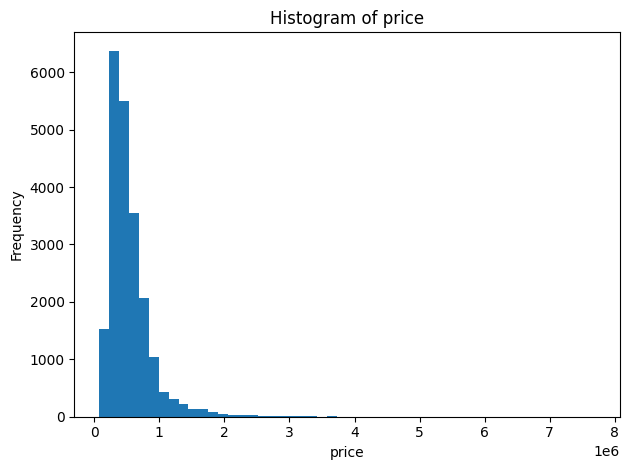

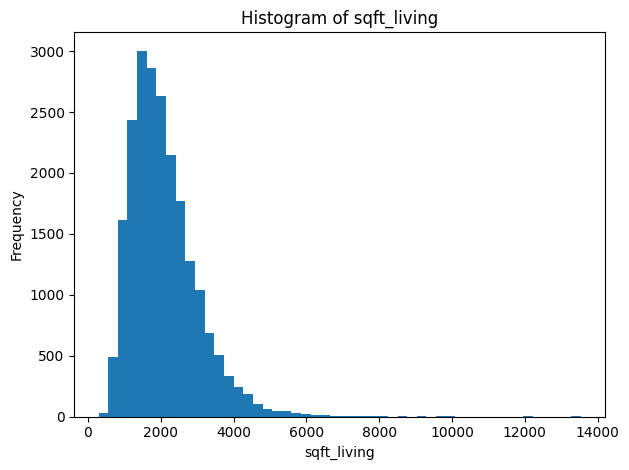

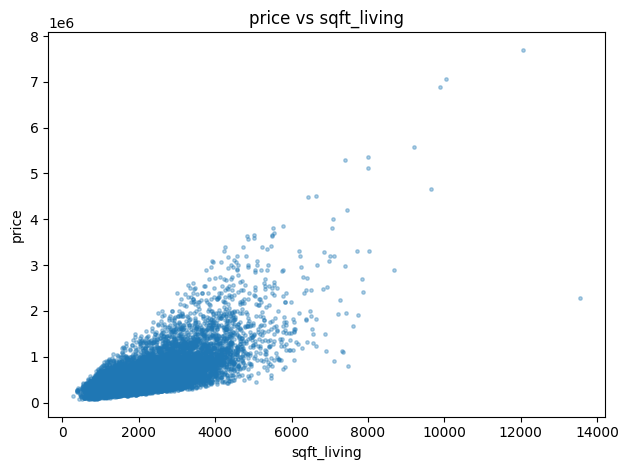


=== Descriptive statistics ===
n = 21613
price: mean=540,088.14, median=450,000.00
sqft_living: mean=2,079.90, median=1,910.00
Correlation(sqft_living, price) = 0.7020

=== Simple linear regression (price ~ sqft_living) ===
Intercept (a) = -43,580.7431
Slope     (b) = 280.6236  (≈ $ per +1 square foot)


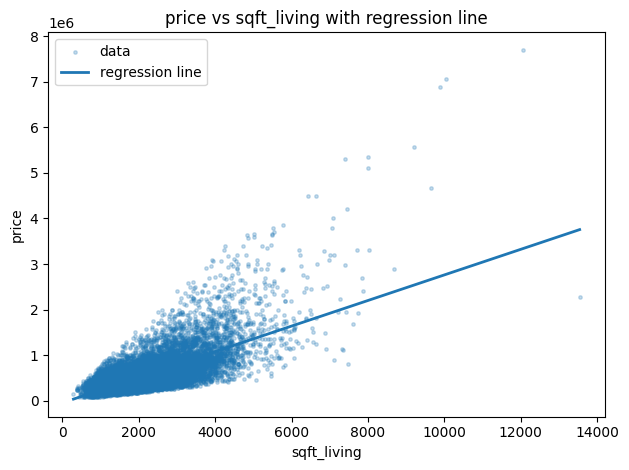


=== Interpretation ===
- Y intercept (~-43,581): predicted price when sqft_living=0 which is not particularly useful given there are no homes with 0 sqft.
- Slope (~281): for each +1 sqft of living area, predicted price increases by about $281 on average.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import (
    is_numeric_dtype, is_datetime64_any_dtype,
    is_bool_dtype, is_string_dtype
)

# data import
df = pd.read_csv("/content/drive/MyDrive/MayoML/AIHC5615FundofStats/week4/kc_house_data.csv")

# data type conversion

if "id" in df.columns:
    df["id"] = df["id"].astype(str)
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
if "zipcode" in df.columns:
    df["zipcode"] = df["zipcode"].astype("category")
if "waterfront" in df.columns:
    try:
        df["waterfront"] = df["waterfront"].astype("category")
    except Exception:
        pass

# variable classification

def classify_dtype(s: pd.Series) -> str:
    if s.dtype.name == "category":
        return "categorical"
    if is_numeric_dtype(s):
        return "numerical"
    if is_datetime64_any_dtype(s):
        return "datetime"
    if is_bool_dtype(s):
        return "boolean"
    if is_string_dtype(s) or s.dtype == "object":
        return "string/other"
    return "other"

var_types_df = pd.DataFrame({
    "variable": df.columns,
    "dtype": [str(df[c].dtype) for c in df.columns],
    "category": [classify_dtype(df[c]) for c in df.columns],
}).sort_values("variable")


print("\n=== Variable types ===")
print(var_types_df.to_string(index=False))

# variable select

y_col = "price"
X_col = "sqft_living" # predictor variable

# histograms
df[y_col].plot(kind="hist", bins=50, title="Histogram of price")
plt.xlabel("price"); plt.tight_layout(); plt.show()

df[X_col].plot(kind="hist", bins=50, title=f"Histogram of {X_col}")
plt.xlabel(X_col); plt.tight_layout(); plt.show()

# scatter
plt.scatter(df[X_col], df[y_col], s=6, alpha=0.35)
plt.title(f"{y_col} vs {X_col}")
plt.xlabel(X_col); plt.ylabel(y_col); plt.tight_layout(); plt.show()

# descriptive stats
n = len(df)
mean_price, median_price = df[y_col].mean(), df[y_col].median()
mean_x, median_x = df[X_col].mean(), df[X_col].median()
corr_px = df[[X_col, y_col]].dropna().corr().iloc[0, 1]

print("\n=== Descriptive statistics ===")
print(f"n = {n}")
print(f"price: mean={mean_price:,.2f}, median={median_price:,.2f}")
print(f"{X_col}: mean={mean_x:,.2f}, median={median_x:,.2f}")
print(f"Correlation({X_col}, price) = {corr_px:.4f}")

# simple linear regression

xy = df[[X_col, y_col]].dropna()
x = xy[X_col].to_numpy()
y = xy[y_col].to_numpy()
b, a = np.polyfit(x, y, 1)

print("\n=== Simple linear regression (price ~ sqft_living) ===")
print(f"Intercept (a) = {a:,.4f}")
print(f"Slope     (b) = {b:,.4f}  (≈ $ per +1 square foot)")

# regression line
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a + b * x_line

plt.scatter(x, y, s=6, alpha=0.25, label="data")
plt.plot(x_line, y_line, linewidth=2, label="regression line")
plt.title(f"{y_col} vs {X_col} with regression line")
plt.xlabel(X_col); plt.ylabel(y_col); plt.legend(); plt.tight_layout(); plt.show()

# Interpretation
print("\n=== Interpretation ===")
print(f"- Y intercept (~{a:,.0f}): predicted price when {X_col}=0 which is not particularly useful given there are no homes with 0 sqft.")
print(f"- Slope (~{b:,.0f}): for each +1 sqft of living area, predicted price increases by about ${b:,.0f} on average.")




=== Standard Errors & 95% CIs ===
n = 21613, df = 21611
Residual SE (σ̂) = 261,452.8876
Intercept (a):  estimate = -43,580.743094,  SE = 4,402.689690,  95% CI = [-52,210.339639, -34,951.146550]
Slope     (b):  estimate = 280.623568,  SE = 1.936399,  95% CI = [276.828084, 284.419052]


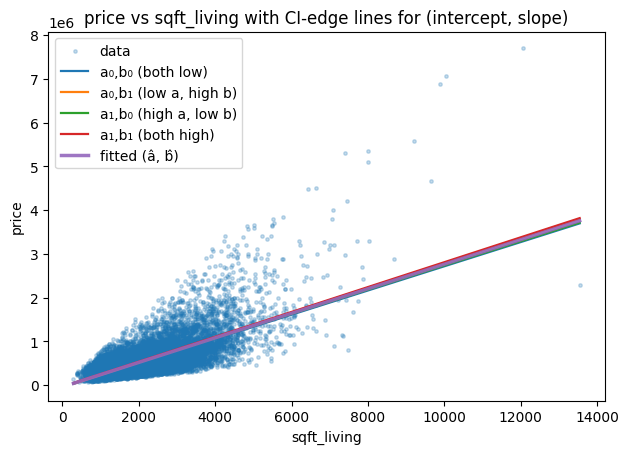


=== Fit diagnostics ===
R^2   = 0.4929
RMSE  = 261,440.79
RSS   = 1,477,276,362,322,489.50

=== Model ability to explain data ===
- Qualitatively the lines appear similar in their slope and intercept. The outliers make visual interpretation of the data difficult.
- The R^2 value of 0.4929 suggests that about 49.3% of the variance in price is explained by sqft_living.
- The RMSE value of 261,440.79 indicates the typical deviation of predicted price from the actual values and in this case I think the estimated housing price is off by about $200,000 which seems quite large given the mean was around $550,000.
- The model is explaining at least some of the variance in the data given R^2 = 0.4929 but in reality there are other factors outside of sqft_living that impact home price, for example number of bedrooms and bathrooms. I think I should have removed the outliers as they are possibly skewing these results or at least making it more difficult for me to interpret this data


In [10]:
# problem 2

n = x.size
xbar = x.mean()
ybar = y.mean()
yhat = a + b * x
resid = y - yhat

Sxx = np.sum((x - xbar)**2)
RSS = np.sum(resid**2)

df_dof = max(n - 2, 1)
sigma2 = RSS / df_dof
sigma = np.sqrt(sigma2)

se_b = np.sqrt(sigma2 / Sxx)
se_a = np.sqrt(sigma2 * (1.0/n + (xbar**2)/Sxx))

try:
    from scipy.stats import t as _t
    tcrit = _t.ppf(0.975, df_dof)
except Exception:
    # Large-sample normal approx
    tcrit = 1.96  # 95% CI for normal distribution

# 95% CIs
a_ci = (a - tcrit*se_a, a + tcrit*se_a)
b_ci = (b - tcrit*se_b, b + tcrit*se_b)

print("\n=== Standard Errors & 95% CIs ===")
print(f"n = {n}, df = {df_dof}")
print(f"Residual SE (σ̂) = {sigma:,.4f}")
print(f"Intercept (a):  estimate = {a:,.6f},  SE = {se_a:,.6f},  95% CI = [{a_ci[0]:,.6f}, {a_ci[1]:,.6f}]")
print(f"Slope     (b):  estimate = {b:,.6f},  SE = {se_b:,.6f},  95% CI = [{b_ci[0]:,.6f}, {b_ci[1]:,.6f}]")


# CI edges
x_line = np.linspace(x.min(), x.max(), 200)
(a0, a1) = a_ci
(b0, b1) = b_ci

lines = [
    (a0, b0, "a₀,b₀ (both low)"),
    (a0, b1, "a₀,b₁ (low a, high b)"),
    (a1, b0, "a₁,b₀ (high a, low b)"),
    (a1, b1, "a₁,b₁ (both high)")
]

plt.figure()
plt.scatter(x, y, s=6, alpha=0.25, label="data")
for (ai, bi, lab) in lines:
    plt.plot(x_line, ai + bi * x_line, linewidth=1.6, label=lab)

# add fitted line
plt.plot(x_line, a + b * x_line, linewidth=2.5, alpha=0.9, label="fitted (â, b̂)")
plt.title(f"{y_col} vs {X_col} with CI-edge lines for (intercept, slope)")
plt.xlabel(X_col); plt.ylabel(y_col); plt.legend(); plt.tight_layout(); plt.show()


TSS = np.sum((y - ybar)**2)
R2 = 1 - RSS/TSS
RMSE = np.sqrt(RSS / n)
print("\n=== Fit diagnostics ===")
print(f"R^2   = {R2:.4f}")
print(f"RMSE  = {RMSE:,.2f}")
print(f"RSS   = {RSS:,.2f}")


print("\n=== Model ability to explain data ===")
print("- Qualitatively the lines appear similar in their slope and intercept. The outliers make visual interpretation of the data difficult.")
print(f"- The R^2 value of {R2:.4f} suggests that about {R2*100:.1f}% of the variance in {y_col} is explained by {X_col}.")
print(f"- The RMSE value of {RMSE:,.2f} indicates the typical deviation of predicted {y_col} from the actual values and in this case I think the estimated housing price is off by about $200,000 which seems quite large given the mean was around $550,000.")
print(f"- The model is explaining at least some of the variance in the data given R^2 = {R2:.4f} but in reality there are other factors outside of {X_col} that impact home price, for example number of bedrooms and bathrooms. I think I should have removed the outliers as they are possibly skewing these results or at least making it more difficult for me to interpret this data")


In [11]:
# problem 3

def _fit_simple(x, y):
    x = np.asarray(x); y = np.asarray(y)
    n = x.size
    xbar = x.mean(); ybar = y.mean()
    Sxx = np.sum((x - xbar)**2)
    Sxy = np.sum((x - xbar)*(y - ybar))
    b = Sxy / Sxx
    a = ybar - b * xbar
    resid = y - (a + b*x)
    RSS = np.sum(resid**2)
    df_dof = max(n - 2, 1)
    sigma2 = RSS / df_dof
    se_b = np.sqrt(sigma2 / Sxx)
    se_a = np.sqrt(sigma2 * (1.0/n + (xbar**2)/Sxx))

    # 95% CI via normal approx
    z = 1.96
    a_ci = (a - z*se_a, a + z*se_a)
    b_ci = (b - z*se_b, b + z*se_b)
    TSS = np.sum((y - ybar)**2)
    R2 = 1 - RSS / TSS
    return dict(a=a, b=b, se_a=se_a, se_b=se_b, a_ci=a_ci, b_ci=b_ci, R2=R2)

# Original fit (
xy = df[[X_col, y_col]].dropna()
fit_orig = _fit_simple(xy[X_col].to_numpy(), xy[y_col].to_numpy())

# for price and sqft calculate the 1st and 99th percentile cutoffs and mask data in those ranges
qx = df[X_col].quantile([0.01, 0.99])
qy = df[y_col].quantile([0.01, 0.99])
mask = (
    df[X_col].between(qx.iloc[0], qx.iloc[1]) &
    df[y_col].between(qy.iloc[0], qy.iloc[1])
)

# df without values in the 1st and 99th percentile range
df3 = df.loc[mask, [X_col, y_col]].dropna().copy()
fit_new = _fit_simple(df3[X_col].to_numpy(), df3[y_col].to_numpy())

# tabulate comparison
cmp = pd.DataFrame({
    'estimate (orig)': [fit_orig['a'], fit_orig['b']],
    'SE (orig)':       [fit_orig['se_a'], fit_orig['se_b']],
    '95% CI (orig)':   [fit_orig['a_ci'], fit_orig['b_ci']],
    'estimate (new)':  [fit_new['a'], fit_new['b']],
    'SE (new)':        [fit_new['se_a'], fit_new['se_b']],
    '95% CI (new)':    [fit_new['a_ci'], fit_new['b_ci']],
}, index=['intercept a', 'slope b'])

print("\Coefficient comparison")
print(f"\nR^2 (orig) = {fit_orig['R2']:.4f} | R^2 (new) = {fit_new['R2']:.4f}")
print("- For the intercept there was a massive change in CI when the values in the 1st and 99th percentile were removed. The slope was not significantly affected. The CI for the intercept is now positive and much tighter which I suppose makes sense.")
print("- The R2 value seemed to get worse so I think I should have probably approached this differently, perhaps removing values based on residuals instead of just being an 'extreme value'")


\Coefficient comparison

R^2 (orig) = 0.4929 | R^2 (new) = 0.4256
- For the intercept there was a massive change in CI when the values in the 1st and 99th percentile were removed. The slope was not significantly affected. The CI for the intercept is now positive and much tighter which I suppose makes sense.
- The R2 value seemed to get worse so I think I should have probably approached this differently, perhaps removing values based on residuals instead of just being an 'extreme value'


<>:52: SyntaxWarning: invalid escape sequence '\C'
<>:52: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-2812304844.py:52: SyntaxWarning: invalid escape sequence '\C'
  print("\Coefficient comparison")


In [12]:
# problem 4

def linear_model(X, Y):
    X = np.asarray(X); Y = np.asarray(Y)
    x_bar = X.mean()
    y_bar = Y.mean()
    # slope = sum((xi - x_bar)*(yi - y_bar)) / sum((xi - x_bar)^2)
    num = np.sum((X - x_bar) * (Y - y_bar))
    den = np.sum((X - x_bar)**2)
    slope = num / den
    intercept = y_bar - slope * x_bar
    return slope, intercept

# cleaned df w/ sqtft and price
b_manual, a_manual = linear_model(df3[X_col].to_numpy(), df3[y_col].to_numpy())

# comparison
print("\nordaniary least squares vs earlier")
print(f"manual slope b  = {b_manual:.6f} | earlier b = {fit_new['b']:.6f}")
print(f"manual intercept a = {a_manual:.6f} | earlier a = {fit_new['a']:.6f}")
print("The results are essentially the same which makes sense because they use the same formula. The results out a few decimal places are different and I assume it's related to rounding but I'm not sure.")



ordaniary least squares vs earlier
manual slope b  = 223.652727 | earlier b = 223.652727
manual intercept a = 60275.611858 | earlier a = 60275.611858
The results are essentially the same which makes sense because they use the same formula. The results out a few decimal places are different and I assume it's related to rounding but I'm not sure.


<>:34: SyntaxWarning: invalid escape sequence '\B'
<>:34: SyntaxWarning: invalid escape sequence '\B'
/tmp/ipython-input-417862036.py:34: SyntaxWarning: invalid escape sequence '\B'
  print("\Bootstrap vs analytic")


\Bootstrap vs analytic
Analytic SE(a)  = 3960.364105 | Bootstrap SE(a)  = 4258.131065
Analytic SE(b)  = 1.798259 | Bootstrap SE(b)  = 2.344464
Analytic CI(a)  = [52513.298212, 68037.925505] | Bootstrap CI(a) = [52051.118620, 68167.162380]
Analytic CI(b)  = [220.128140, 227.177314] | Bootstrap CI(b) = [219.406111, 228.115420]
- Using bootstrap resampling and not assuming the distribution of the data the CI seem to be fairly similar to the previous analysis which assumed a normal distribution. The histogram was basically bell shaped so I think that makes sense especially considering I got rid of the outliers so it helps validate the code and initial analysis.


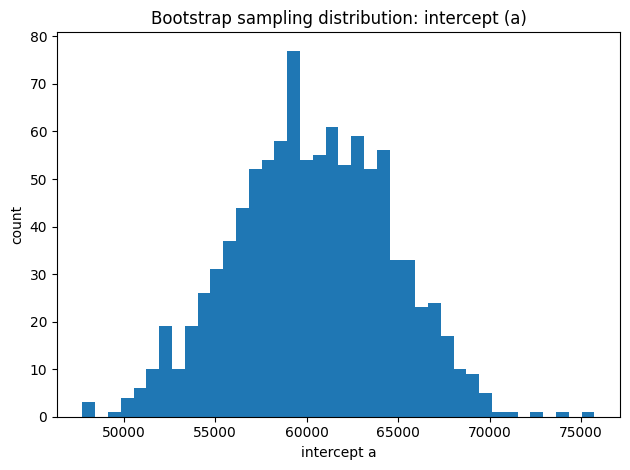

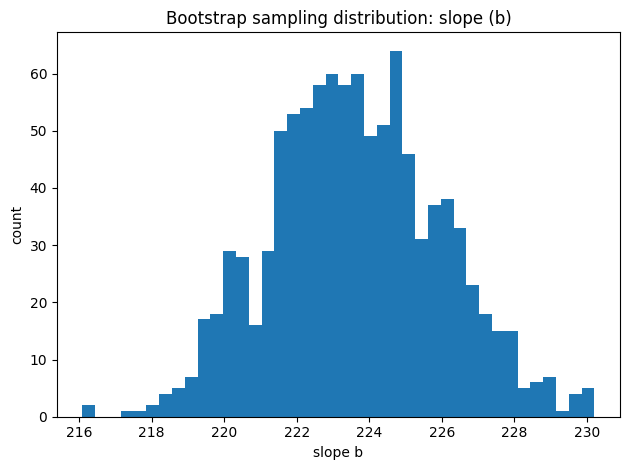

In [13]:
# problem 5

rng = np.random.default_rng(42)

def _fit_ab(X, Y):
    X = np.asarray(X); Y = np.asarray(Y)
    x_bar = X.mean(); y_bar = Y.mean()
    Sxx = np.sum((X - x_bar)**2)
    Sxy = np.sum((X - x_bar)*(Y - y_bar))
    b = Sxy / Sxx
    a = y_bar - b * x_bar
    return a, b

xB = df3[X_col].to_numpy()
yB = df3[y_col].to_numpy()

B = 1000
a_samples = np.empty(B)
b_samples = np.empty(B)

nB = xB.size
for i in range(B):
    idx = rng.integers(0, nB, size=nB)
    a_i, b_i = _fit_ab(xB[idx], yB[idx])
    a_samples[i] = a_i
    b_samples[i] = b_i

# Bootstrap SEs and 95% CIs
boot_se_a = a_samples.std(ddof=1)
boot_se_b = b_samples.std(ddof=1)
boot_ci_a = (np.percentile(a_samples, 2.5), np.percentile(a_samples, 97.5))
boot_ci_b = (np.percentile(b_samples, 2.5), np.percentile(b_samples, 97.5))

print("\Bootstrap vs analytic")
print(f"Analytic SE(a)  = {fit_new['se_a']:.6f} | Bootstrap SE(a)  = {boot_se_a:.6f}")
print(f"Analytic SE(b)  = {fit_new['se_b']:.6f} | Bootstrap SE(b)  = {boot_se_b:.6f}")
print(f"Analytic CI(a)  = [{fit_new['a_ci'][0]:.6f}, {fit_new['a_ci'][1]:.6f}] | Bootstrap CI(a) = [{boot_ci_a[0]:.6f}, {boot_ci_a[1]:.6f}]")
print(f"Analytic CI(b)  = [{fit_new['b_ci'][0]:.6f}, {fit_new['b_ci'][1]:.6f}] | Bootstrap CI(b) = [{boot_ci_b[0]:.6f}, {boot_ci_b[1]:.6f}]")
print("- Using bootstrap resampling and not assuming the distribution of the data the CI seem to be fairly similar to the previous analysis which assumed a normal distribution. The histogram was basically bell shaped so I think that makes sense especially considering I got rid of the outliers so it helps validate the code and initial analysis.")

# Histograms
plt.figure(); plt.hist(a_samples, bins=40); plt.title("Bootstrap sampling distribution: intercept (a)")
plt.xlabel("intercept a"); plt.ylabel("count"); plt.tight_layout(); plt.show()

plt.figure(); plt.hist(b_samples, bins=40); plt.title("Bootstrap sampling distribution: slope (b)")
plt.xlabel("slope b"); plt.ylabel("count"); plt.tight_layout(); plt.show()